In [ ]:
from pathlib import Path
import os
import sys
import pandas as pd
from unidecode import unidecode
import unicodedata
import numpy as np
import math as m
import re

import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
ruta = "Resultados/Data_SEN_Final_2030Previo.xlsx"
pd.set_option('display.max_rows', 50)   
Data = pd.read_excel(ruta,sheet_name="Data")
Data_load = pd.read_excel(ruta,sheet_name="Load")
Data

,Name1,Name2,Name3,Nombre PowerFactory,Type,EMTP Status,EMTP Load Flow Component,Página PowerFactory,Tensión en Bornes [kV],P despachada [MW],Q despachada [Mvar],Tipo de Barra Flujo de Carga,Sbase [MVA],P_set [MW],Q_set [Mvar],V_set [kV],Tensión Nominal [kV],Potencia Nominal [MVA],Nº_unid_serv,Nº_unid
0,PFV_EL_PELICANO,PFV_EL_PELICANO,NaN,NaN,Parque Fotovoltaico,1,NaN,02-Coquimbo,NaN,NaN,NaN,NaN,110.00,67.87,-16.10,NaN,220.0,110.00,66,66
1,PFV_LA_HUELLA,PFV_LA_HUELLA,NaN,PFV LA HUELLA,Parque Fotovoltaico,1,NaN,02-Coquimbo,NaN,NaN,NaN,NaN,94.38,58.23,-24.07,NaN,220.0,94.38,26,26
2,PFV_EL_ROMERO,PFV_EL_ROMERO,NaN,PFV EL ROMERO,Parque Fotovoltaico,1,NaN,02-Coquimbo,NaN,NaN,NaN,NaN,206.89,127.65,-74.31,NaN,220.0,206.89,190,190
3,PFV_VALLE_ESCONDIDO,PFV_VALLE_ESCONDIDO,NaN,PFV VALLE ESCONDIDO,Parque Fotovoltaico,1,NaN,01-Atacama,NaN,NaN,NaN,NaN,106.69,65.83,-21.81,NaN,220.0,106.69,64,64
4,PFV_SAN_ANDRES,PFV_SAN_ANDRES,NaN,PFV SAN ANDRES,Parque Fotovoltaico,1,NaN,01-Atacama,NaN,NaN,NaN,NaN,50.58,13.56,-6.20,NaN,220.0,50.58,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,BESS_Andes_III_Etapa_I,NaN,NaN,NaN,BESS,1,NaN,00-Norte Grande,NaN,NaN,NaN,NaN,80.00,-80.00,0.00,NaN,220.0,80.00,80,80
354,BESS_GABRIELA,NaN,NaN,NaN,BESS,1,NaN,00-Norte Grande,NaN,NaN,NaN,NaN,220.00,-220.00,0.00,NaN,220.0,220.00,220,220
355,BESS_VICTOR_JARA,NaN,NaN,NaN,BESS,1,NaN,00-Norte Grande,NaN,NaN,NaN,NaN,200.00,-200.00,0.00,NaN,220.0,220.00,200,200
356,BESS_La_Cabana,NaN,NaN,NaN,BESS,1,NaN,10-Araucanía,NaN,NaN,NaN,NaN,32.00,-32.00,0.00,NaN,220.0,32.00,32,32


In [3]:
# aqui separo la data por tipo de generación y que este activadas 
Data_PV = Data[(Data['Type'] == 'Parque Fotovoltaico') & (Data['EMTP Status'] == 1)]
Data_WP = Data[(Data['Type'] == 'Parque Eólico') & (Data['EMTP Status'] == 1)]
Data_SG = Data[(Data['Type'] == 'Generador Sincrónico') & (Data['EMTP Status'] == 1)]
Data_GFM = Data[(Data['Type'] == 'Grid Forming') & (Data['EMTP Status'] == 1)]
Data_PMGD = Data[(Data['Type'] == 'PMGD') & (Data['EMTP Status'] == 1)]
Data_BESS = Data[(Data['Type'] == 'BESS') & (Data['EMTP Status'] == 1)]

##---------- arreglo sincronico 
Data_SG.loc[Data_SG['Name1'] == 'Cochrane_U2', 'Página PowerFactory'] = '00-Norte Grande'
#------------------------------------------------------------

SUMA_PV_P = Data_PV['P_set [MW]'].sum()
SUMA_WP_P = Data_WP['P_set [MW]'].sum()
SUMA_SG_P = Data_SG['P_set [MW]'].sum()
SUMA_GFM_P = Data_GFM['P_set [MW]'].sum()
SUMA_PMGD_P = Data_PMGD['P_set [MW]'].sum()


Total = SUMA_PV_P + SUMA_WP_P+ SUMA_SG_P + SUMA_PMGD_P #+ SUMA_GFM_
SUMA_GFL_P = SUMA_PV_P+SUMA_WP_P+SUMA_PMGD_P


pPV= round(float(100*SUMA_PV_P/Total),1)
pWP= round(float(100*SUMA_WP_P/Total),1)
pSG= round(float(100*SUMA_SG_P/Total),1)
pGFM= round(float(100*SUMA_GFM_P/Total),1)
pPMGD=round( float(100*SUMA_PMGD_P/Total),1)
pGFL= round(float(100*SUMA_GFL_P/Total),1)
SUMA_SG_P


2433.1

In [4]:
#nominal en servicio

Data_PV = Data[(Data['Type'] == 'Parque Fotovoltaico') & (Data['EMTP Status'] == 1)]
Data_WP = Data[(Data['Type'] == 'Parque Eólico') & (Data['EMTP Status'] == 1)]
Data_SG = Data[(Data['Type'] == 'Generador Sincrónico') & (Data['EMTP Status'] == 1)]
#Data_GFM = Data[(Data['Type'] == 'Grid Forming') & (Data['EMTP Status'] == 1)]

SUMA_PV_nom = Data_PV['Sbase [MVA]'].sum()
SUMA_WP_nom = Data_WP['Sbase [MVA]'].sum()
SUMA_SG_nom = Data_SG['Potencia Nominal [MVA]'].sum()
suma_PMGD_nom= Data_SG["Sbase [MVA]"].sum()
#SUMA_GFM_nom = Data_GFM['Sbase [MVA]'].sum()

Total_nom = SUMA_PV_nom + SUMA_WP_nom+ SUMA_SG_nom+ suma_PMGD_nom  ###+ SUMA_GFM_nom
SUMA_GFL_nom = SUMA_PV_nom+SUMA_WP_nom+suma_PMGD_nom
pPV_nom= 100*SUMA_PV_nom/Total_nom
pWP_nom= 100*SUMA_WP_nom/Total_nom
pSG_nom= 100*SUMA_SG_nom/Total_nom
pPMGD_nom=100*suma_PMGD_nom/Total_nom

#pGFM_nom= 100*SUMA_GFM_nom/Total_nom
pGFL_nom= 100*SUMA_GFL_nom/Total_nom
print(SUMA_SG_nom,SUMA_WP_nom,SUMA_PV_nom)


6788.14 5791.3 11105.05


In [5]:
unidades = ["Synchronous Generation","GFL"]
Sumas =[SUMA_SG_P, SUMA_GFL_P ]
Porcentaje = [pSG,pGFL]
Suma_nom = [SUMA_SG_nom, SUMA_GFL_nom]
Porcentaje_nom = [pSG_nom,pGFL_nom]

data_resultados = {"Type of Generation": unidades, 
                    "Dispatched active power [MW]": Sumas,
                    "Dispatch participation [%]": Porcentaje,
                    "Nominal Capacity in service [MW]" :  Suma_nom,
                    "In-service capacity participation [%]" : Porcentaje_nom
}
data_resultados= pd.DataFrame(data_resultados)
data_resultados

,Type of Generation,Dispatched active power [MW],Dispatch participation [%],Nominal Capacity in service [MW],In-service capacity participation [%]
0,Synchronous Generation,2433.10,20.7,6788.14,22.276187
1,GFL,9320.52,79.3,23684.49,77.723813


# Figuras por tipo de generación

C:\Users\fabian.medina\AppData\Local\Temp\ipykernel_19172\616576902.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tipo de generación', y='Porcentajes', data=df, palette='viridis')


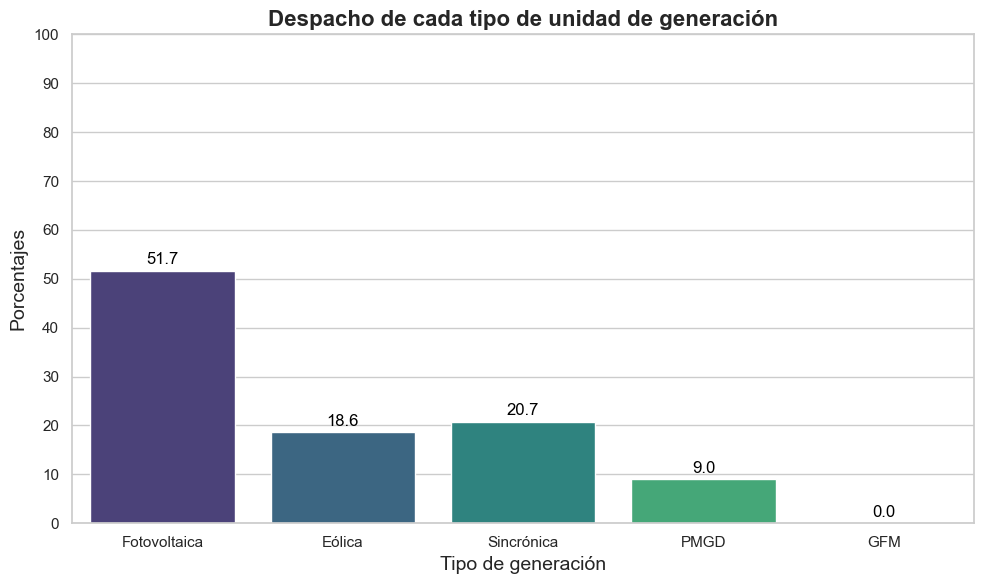

In [6]:

data = {
    'Tipo de generación': ['Fotovoltaica', 'Eólica', 'Sincrónica', 'PMGD', 'GFM'],
    'Porcentajes': [pPV, pWP, pSG, pPMGD, pGFM]
}
df = pd.DataFrame(data)

# Estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tipo de generación', y='Porcentajes', data=df, palette='viridis')

# Personalización
ax.set_title('Despacho de cada tipo de unidad de generación', fontsize=16, fontweight='bold')
ax.set_xlabel('Tipo de generación', fontsize=14)
ax.set_ylabel('Porcentajes', fontsize=14)
ax.set_yticks(range(0, 101, 10))  # Ajuste de las marcas del eje Y

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=12, 
                color='black')

# Mejorar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [7]:
Tipos = ["Tipo", "Potencia [MW]"] # inserto primela columna

df = pd.DataFrame(columns=Tipos)

df.loc[0]= ["Fotovoltaica",SUMA_PV_P]
df.loc[1] = ["Eólica",SUMA_WP_P]
df.loc[2] = ["Sincrónica",SUMA_SG_P]
df.loc[3] = ["PMGD",SUMA_PMGD_P]
df.loc[4] = ["GFM",0]
#---- cambio el nombre para exportar 
Tabla_Tipos = df 
Tabla_Tipos

,Tipo,Potencia [MW]
0,Fotovoltaica,6071.66
1,Eólica,2187.97
2,Sincrónica,2433.10
3,PMGD,1060.89
4,GFM,0.00


# Graficas por zonas


In [8]:
# defino zonas
zonas = [   '00-Norte Grande' ,'01-Atacama','02-Coquimbo','03-Chilquinta-Aconcagua'	, '04-Enel Distribución',
        '05-Colbún'	,'06-Troncal_Qui-Cha', '07-Sistema154 - 66 kV (Centro)','08-Charrúa','09-Concepción', '10-Araucanía']

#defino la potencia suministrada por zona 
def Potencia_zonas(Data,zonas):
      l_aux=[]
      for i in zonas:
            Generacion = Data[(Data['Página PowerFactory'] == i) ]
            SUMA_Generacion=  Generacion['P_set [MW]'].sum()
            x=float(SUMA_Generacion)
            xr= round(x,0)
            l_aux.append(xr)
      return l_aux      


PV_zonas =Potencia_zonas(Data_PV,zonas)
WP_zonas =Potencia_zonas(Data_WP,zonas)
SG_zonas =Potencia_zonas(Data_SG,zonas)
PMGD_zonas =Potencia_zonas(Data_PMGD,zonas)



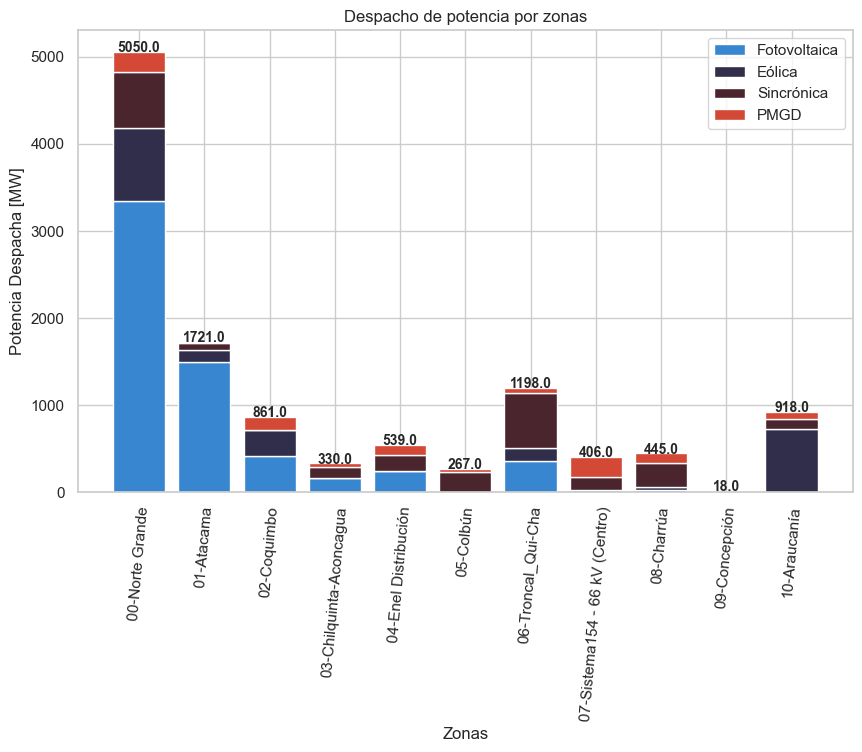

In [9]:
# Datos de ejemplo
categories = zonas
values1 = PV_zonas
values2 = WP_zonas
values3 = SG_zonas
values4 = PMGD_zonas

# Configurar la posición de las barras
x = np.arange(len(categories))

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("icefire", n_colors=4)

bar1 = ax.bar(x, values1, label='Fotovoltaica', color=colors[0])
bar2 = ax.bar(x, values2, bottom=values1, label='Eólica', color=colors[1])
bar3 = ax.bar(x, values3, bottom=np.array(values1) + np.array(values2), label='Sincrónica', color=colors[2])
bar4 = ax.bar(x, values4, bottom=np.array(values1) + np.array(values2)+np.array(values3), label='PMGD', color=colors[3])



# Calcular el total de cada barra y agregar las etiquetas en la parte superior
totals = np.array(values1) + np.array(values2) + np.array(values3)+np.array(values4)
for i in range(len(x)):
    ax.text(x[i], totals[i] + 0.5, str(totals[i]), ha='center', fontsize=10, fontweight='bold')

# Configurar etiquetas y leyenda
ax.set_xlabel('Zonas')
ax.set_ylabel('Potencia Despacha [MW]')
ax.set_title('Despacho de potencia por zonas')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.xticks(rotation=85)
ax.legend()

plt.show()

In [10]:

#-------------------- defino tabla

zonas.insert(0,"TipoGEN\Zonas") # inserto primela columna

df = pd.DataFrame(columns=zonas)
PV_zonas.insert(0,"PV")
WP_zonas.insert(0,"WP")
SG_zonas.insert(0,"SG")
PMGD_zonas.insert(0,"PMGD")
df.loc[0]= PV_zonas
df.loc[1] = WP_zonas
df.loc[2] = SG_zonas
df.loc[3] = PMGD_zonas
#---- cambio el nombre para exportar 
Tabla_GEN_zonas = df 
Tabla_GEN_zonas

,TipoGEN\Zonas,00-Norte Grande,01-Atacama,02-Coquimbo,03-Chilquinta-Aconcagua,04-Enel Distribución,05-Colbún,06-Troncal_Qui-Cha,07-Sistema154 - 66 kV (Centro),08-Charrúa,09-Concepción,10-Araucanía
0,PV,3339.0,1497.0,412.0,169.0,243.0,0.0,359.0,25.0,28.0,0.0,0.0
1,WP,844.0,140.0,304.0,0.0,0.0,0.0,146.0,0.0,34.0,0.0,721.0
2,SG,637.0,76.0,0.0,123.0,185.0,237.0,633.0,146.0,271.0,0.0,124.0
3,PMGD,230.0,8.0,145.0,38.0,111.0,30.0,60.0,235.0,112.0,18.0,73.0


array([882., 195.,  -0.,  60.,  60.,  -0.,  -0.,  -0.,  -0.,  -0.,  65.])

# BESS Por Zonas 


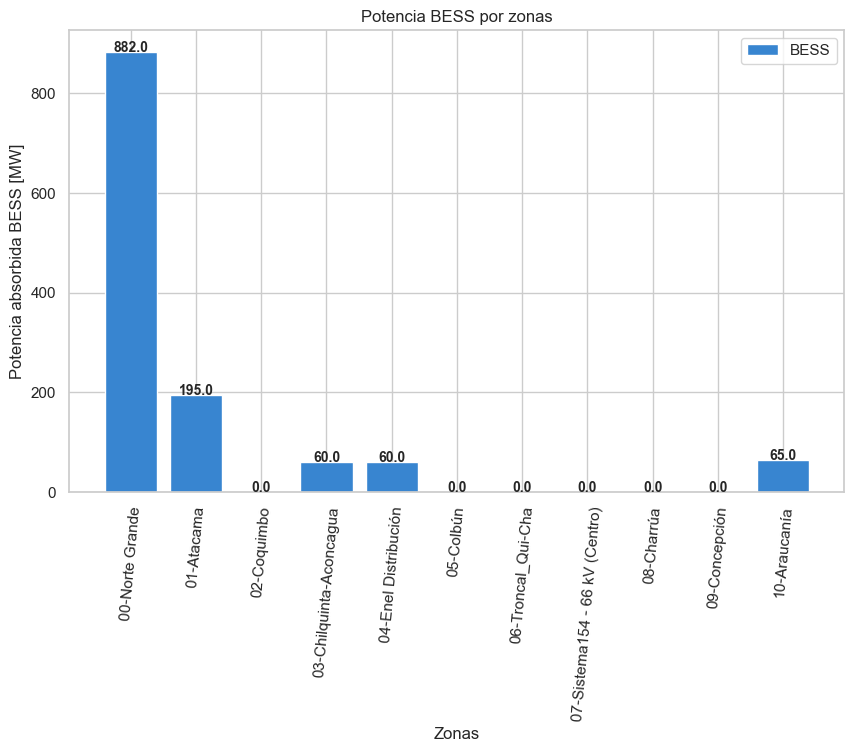

In [11]:
# defino zonas
zonas = [   '00-Norte Grande' ,'01-Atacama','02-Coquimbo','03-Chilquinta-Aconcagua'	, '04-Enel Distribución',
        '05-Colbún'	,'06-Troncal_Qui-Cha', '07-Sistema154 - 66 kV (Centro)','08-Charrúa','09-Concepción', '10-Araucanía']
BESS_zonas =abs(np.array(Potencia_zonas(Data_BESS,zonas)))

# Datos de ejemplo
categories = zonas
values1 = BESS_zonas


# Configurar la posición de las barras
x = np.arange(len(categories))

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("icefire", n_colors=4)

bar1 = ax.bar(x, values1, label='BESS', color=colors[0])


# Calcular el total de cada barra y agregar las etiquetas en la parte superior
totals = np.array(values1) 
for i in range(len(x)):
    ax.text(x[i], totals[i] + 0.5, str(totals[i]), ha='center', fontsize=10, fontweight='bold')

# Configurar etiquetas y leyenda
ax.set_xlabel('Zonas')
ax.set_ylabel('Potencia absorbida BESS [MW]')
ax.set_title('Potencia BESS por zonas')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.xticks(rotation=85)
ax.legend()

plt.show()

In [12]:
#-------------------- defino tabla


df = pd.DataFrame(columns=zonas)
#-------------------- defino tabla

#agrego filas 
df.loc[0]= BESS_zonas

df.insert(0 ,"BESS\Zonas",["BESS"] )
#---- cambio el nombre para exportar 

Tabla_BESS = df
Tabla_BESS

,BESS\Zonas,00-Norte Grande,01-Atacama,02-Coquimbo,03-Chilquinta-Aconcagua,04-Enel Distribución,05-Colbún,06-Troncal_Qui-Cha,07-Sistema154 - 66 kV (Centro),08-Charrúa,09-Concepción,10-Araucanía
0,BESS,882.0,195.0,0.0,60.0,60.0,0.0,0.0,0.0,0.0,0.0,65.0


# Generación sincronica por tipo 

In [13]:
# en esta casilla juinto la data SG + la data de generaciòn sincronica correspondiente

Data_SG=Data_SG[["Name1","Name2","Name3","Página PowerFactory","P_set [MW]"]]
Data_SG["TipoSG"]= len(Data_SG)*["-"]
Data_SG=Data_SG.reset_index(drop=True)

Tipo_SG = pd.read_excel("Plantas.xlsx", sheet_name="SG_tipos")


# busco tipo de SG en excel que contiene la info
c=-1
for Name1 in Data_SG["Name1"]:
    c=c+1
    c2=-1
    Name3 = Data_SG.at[c,"Name3"]
    for Name in Tipo_SG["Name1"]:
       
        c2=c2+1
        Name3_2= Tipo_SG.at[c2,"Name3"]
        if Name1 == Name: 
            Data_SG.at[c,"TipoSG"]=Tipo_SG.at[c2,"Tipo_SG"]
        elif Name3 ==Name3_2:
            Data_SG.at[c,"TipoSG"]=Tipo_SG.at[c2,"Tipo_SG"]
        ## agrego Cochrane_U2 que no estaba     
        elif Name1 == "Cochrane_U2":
            Data_SG.at[c,"TipoSG"]="TER Turbina a vapor"
            Data_SG.at[c,"Página PowerFactory"]="00-Norte Grande"
            


Data_SG            

,Name1,Name2,Name3,Página PowerFactory,P_set [MW],TipoSG
0,Central_San_Isidro,San_Isidro_U2_TV,San_Isidro_U2_TV,06-Troncal_Qui-Cha,64.00,TER Ciclo combinado
1,Central_San_Isidro,San_Isidro_U2_TG,San_Isidro_U2_TG,06-Troncal_Qui-Cha,105.00,TER Ciclo combinado
2,Central_Nehuenco,Nehuenco_U2_TG,Nehuenco_U2_TG,06-Troncal_Qui-Cha,110.00,TER Ciclo combinado
3,Central_Nehuenco,Nehuenco_U2_TV,Nehuenco_U2_TV,06-Troncal_Qui-Cha,85.00,TER Ciclo combinado
4,Central_Hornitos,Hornitos_U1,Hornitos_U1,03-Chilquinta-Aconcagua,22.60,Hidroeléctrica de Pasada
5,Los_Quilos_Juncal,Los_Quillos,LosQuilos,03-Chilquinta-Aconcagua,32.40,Hidroeléctrica de Pasada
6,Los_Quilos_Juncal,Blanco,Blanco,03-Chilquinta-Aconcagua,49.50,Hidroeléctrica de Pasada
7,Los_Quilos_Juncal,Juncal,Juncal,03-Chilquinta-Aconcagua,18.90,Hidroeléctrica de Pasada
8,Central_Guacolda,Guacolda_U4,Guacolda_U4,01-Atacama,38.00,TER Turbina a vapor
9,Central_Guacolda,Guacolda_U5,Guacolda_U5,01-Atacama,38.00,TER Turbina a vapor


In [14]:
# defino zonas
zonas = [   '00-Norte Grande' ,'01-Atacama','02-Coquimbo','03-Chilquinta-Aconcagua'	, '04-Enel Distribución',
        '05-Colbún'	,'06-Troncal_Qui-Cha', '07-Sistema154 - 66 kV (Centro)','08-Charrúa','09-Concepción', '10-Araucanía']



DataHP = Data_SG[Data_SG['TipoSG'] == 'Hidroeléctrica de Pasada']
DataVapor = Data_SG[Data_SG['TipoSG'].str.contains('TER Turbina a vapor',case=False, na=False)]
DataCC = Data_SG[Data_SG['TipoSG'] == 'TER Ciclo combinado']
DataHE = Data_SG[Data_SG['TipoSG'] == 'Hidroeléctrica de Embalse']


HP_zonas =Potencia_zonas(DataHP,zonas)
HE_zonas =Potencia_zonas(DataHE,zonas)
DataVapor_zonas =Potencia_zonas(DataVapor,zonas)
DataCC_zonas =Potencia_zonas(DataCC,zonas)
#-------------------- defino tabla

df = pd.DataFrame(columns=zonas)
#agrego filas 
df.loc[0]= HP_zonas
df.loc[1] = HE_zonas
df.loc[2] = DataVapor_zonas
df.loc[3] = DataCC_zonas
df.insert(0 ,"TipoGen\Zonas",["HP","HE","Vapor","Ciclo Combinado"] )
#---- cambio el nombre para exportar 

Tabla_SG_tipos = df
Tabla_SG_tipos


,TipoGen\Zonas,00-Norte Grande,01-Atacama,02-Coquimbo,03-Chilquinta-Aconcagua,04-Enel Distribución,05-Colbún,06-Troncal_Qui-Cha,07-Sistema154 - 66 kV (Centro),08-Charrúa,09-Concepción,10-Araucanía
0,HP,0.0,0.0,0.0,123.0,185.0,0.0,17.0,146.0,18.0,0.0,0.0
1,HE,0.0,0.0,0.0,0.0,0.0,237.0,252.0,0.0,253.0,0.0,124.0
2,Vapor,567.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ciclo Combinado,70.0,0.0,0.0,0.0,0.0,0.0,364.0,0.0,0.0,0.0,0.0


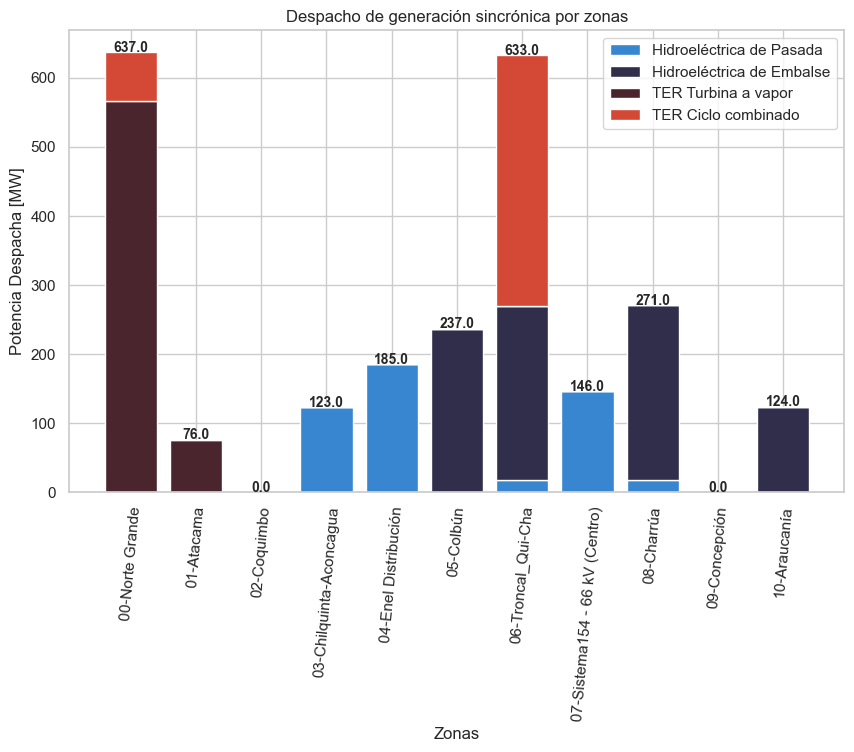

In [15]:
categories = zonas
values1 = HP_zonas
values2 = HE_zonas
values3 = DataVapor_zonas
values4 = DataCC_zonas

# Configurar la posición de las barras
x = np.arange(len(categories))

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("icefire", n_colors=4)

bar1 = ax.bar(x, values1, label='Hidroeléctrica de Pasada', color=colors[0])
bar2 = ax.bar(x, values2, bottom=values1, label='Hidroeléctrica de Embalse', color=colors[1])
bar3 = ax.bar(x, values3, bottom=np.array(values1) + np.array(values2), label='TER Turbina a vapor', color=colors[2])
bar4 = ax.bar(x, values4, bottom=np.array(values1) + np.array(values2)+np.array(values3), label='TER Ciclo combinado', color=colors[3])



# Calcular el total de cada barra y agregar las etiquetas en la parte superior
totals = np.array(values1) + np.array(values2) + np.array(values3)+np.array(values4)
for i in range(len(x)):
    ax.text(x[i], totals[i] + 0.5, str(totals[i]), ha='center', fontsize=10, fontweight='bold')

# Configurar etiquetas y leyenda
ax.set_xlabel('Zonas')
ax.set_ylabel('Potencia Despacha [MW]')
ax.set_title('Despacho de generación sincrónica por zonas')
ax.set_xticks(x)
ax.set_xticklabels(categories)
plt.xticks(rotation=85)
ax.legend()

plt.show()

# Cargas por zonas 

In [16]:
# defino zonas
zonas = [   '00-Norte Grande' ,'01-Atacama','02-Coquimbo','03-Chilquinta-Aconcagua'	, '04-Enel Distribución',
        '05-Colbún'	,'06-Troncal_Qui-Cha', '07-Sistema154 - 66 kV (Centro)','08-Charrúa','09-Concepción', '10-Araucanía']



Carga_zonas = Potencia_zonas(Data_load,zonas) 


#-------------------- defino tabla

df = pd.DataFrame(columns=zonas)
#agrego filas 
df.loc[0]= Carga_zonas

df.insert(0 ,"TipoLoad\Zonas",["Loads"] )
#---- cambio el nombre para exportar 

Tabla_Load_tipos = df
Tabla_Load_tipos

,TipoLoad\Zonas,00-Norte Grande,01-Atacama,02-Coquimbo,03-Chilquinta-Aconcagua,04-Enel Distribución,05-Colbún,06-Troncal_Qui-Cha,07-Sistema154 - 66 kV (Centro),08-Charrúa,09-Concepción,10-Araucanía
0,Loads,2930.0,380.0,905.0,637.0,2577.0,455.0,662.0,568.0,356.0,370.0,477.0


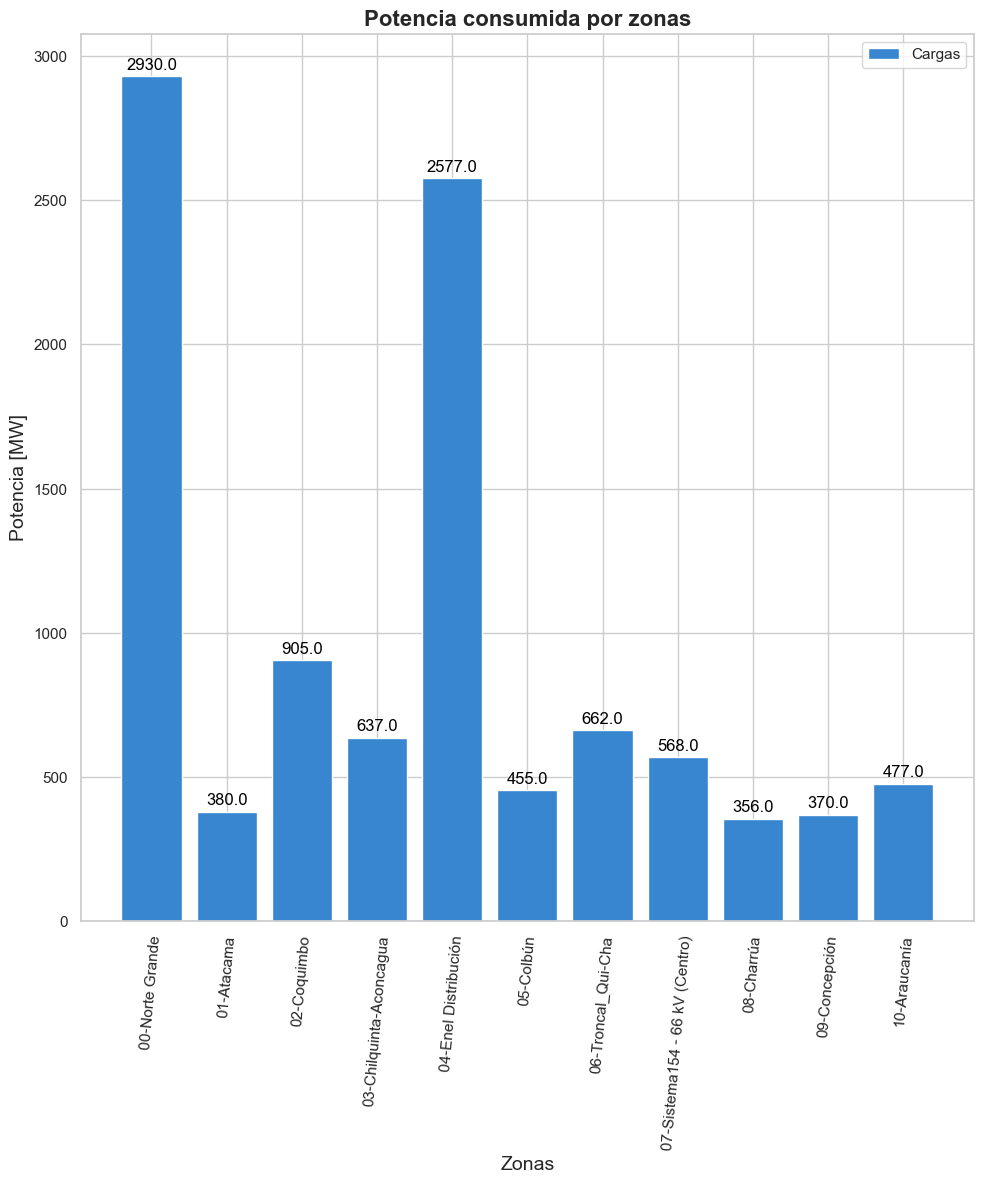

In [17]:
data = {
    'zonas': zonas,
    'Loads': Carga_zonas,
}
df = pd.DataFrame(data)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 12))

# Usar una paleta de colores de seaborn
colors = sns.color_palette("icefire", n_colors=4)

# Crear las barras apiladas con colores personalizados
bar1 = ax.bar(df['zonas'], df['Loads'], label='Cargas', color=colors[0])  # Azul claro

# Personalización
ax.set_title('Potencia consumida por zonas', fontsize=16, fontweight='bold')
ax.set_xlabel('Zonas', fontsize=14)
ax.set_ylabel('Potencia [MW]', fontsize=14)
ax.set_yticks(range(0, 3001, 500))  # Ajuste de las marcas del eje Y
# Cambiar la orientación de las etiquetas del eje X a 45 grados
plt.xticks(rotation=90)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=12, 
                color='black')

# Añadir la leyenda
ax.legend()                
# Mejorar el layout
plt.tight_layout()
plt.xticks(rotation=85)

# Mostrar el gráfico
plt.show()                

# EXCEL

In [104]:
with pd.ExcelWriter('Resultados/Tablas_SEN_2026_93GVAs.xlsx') as writer:
    Tabla_Tipos.to_excel(writer, sheet_name='Tipos',index=False)
    Tabla_GEN_zonas.to_excel(writer, sheet_name='GEN',index=False)
    Tabla_SG_tipos.to_excel(writer, sheet_name='SG',index=False)
    Tabla_Load_tipos.to_excel(writer, sheet_name='Load',index=False)
    Tabla_BESS.to_excel(writer,sheet_name="BESS",index= False)
    data_resultados.to_excel(writer,sheet_name="Resumen",index = False)
    #df_nuevo.to_excel(writer, sheet_name='Data',index=False)

In [24]:
SG_Snom_serv=Data.loc[(Data['Type'] == "Generador Sincrónico")  & (Data["EMTP Status"] > 0) , 'Potencia Nominal [MVA]'].sum()
PV_Snom_serv=Data.loc[(Data['Type'] == "Parque Fotovoltaico")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
WP_Snom_serv=Data.loc[(Data['Type'] == "Parque Eólico")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
GFM_Snom_serv=Data.loc[(Data['Type'] == "Grid Forming")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
print(SG_Snom_serv,PV_Snom_serv,WP_Snom_serv,GFM_Snom_serv)

4664.9360000000015 9490.1453 4686.414000000001 0.0


In [25]:
datos = {'Potencia despachada': [PFV_P, WP_P,SG_P, GFM_P]}

#datos = {'Potencia despachada': [pPV, pWP,pSG, pGFM]}
df = pd.DataFrame(datos, index=['Fotovoltaica', 'Eolica', 'Sincronica', 'GFM'])

# Crear un gráfico de barras
df.plot(kind='bar', legend=False)

# Añadir etiquetas y título
plt.xlabel('Tipo de generacion')
plt.ylabel('Potencia despachada [MW]')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()

NameError: name 'PFV_P' is not defined

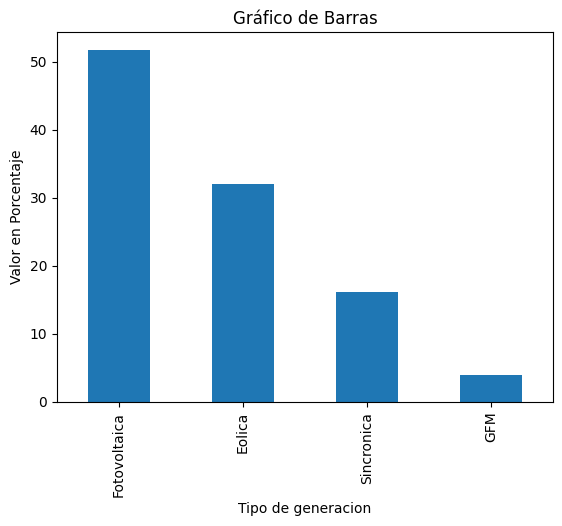

In [21]:
#datos = {'Potencia despachada': [PFV_P, WP_P,SG_P, GFM_P]}

datos = {'Potencia despachada': [pPV, pWP,pSG, pGFM]}
df = pd.DataFrame(datos, index=['Fotovoltaica', 'Eolica', 'Sincronica', 'GFM'])

# Crear un gráfico de barras
df.plot(kind='bar', legend=False)

# Añadir etiquetas y título
plt.xlabel('Tipo de generacion')
plt.ylabel('Valor en Porcentaje')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()

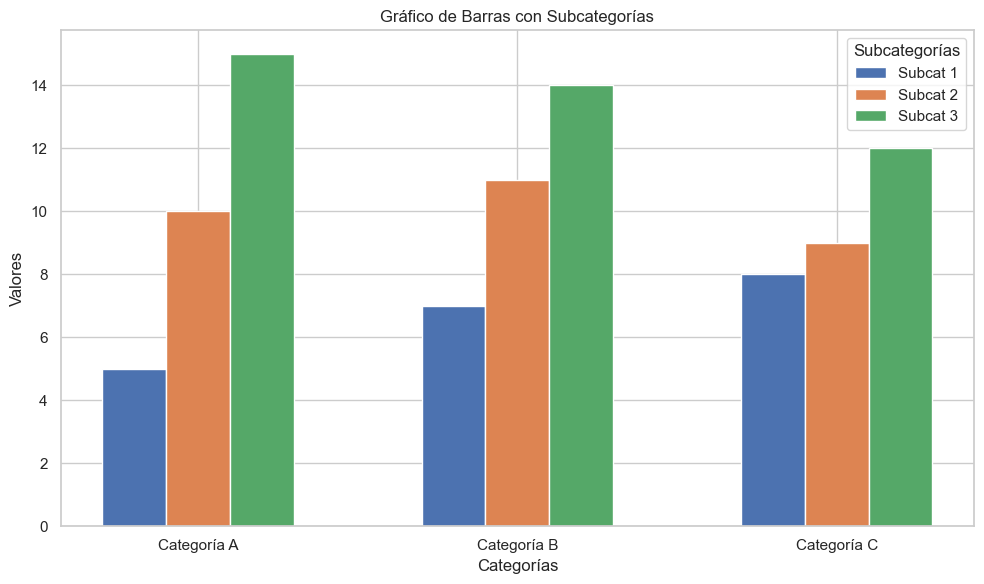

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
categorias = ['Categoría A', 'Categoría B', 'Categoría C']
subcategorias = ['Subcat 1', 'Subcat 2', 'Subcat 3']

# Valores para cada subcategoría en cada categoría
valores = [
    [5, 10, 15],  # Valores para Categoría A
    [7, 11, 14],  # Valores para Categoría B
    [8, 9, 12]    # Valores para Categoría C
]

# Configuración de la posición de las barras
x = np.arange(len(categorias))  # La posición de las categorías
ancho = 0.2  # El ancho de cada barra

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras para cada subcategoría
for i, subcat in enumerate(subcategorias):
    ax.bar(x + i * ancho, [valores[j][i] for j in range(len(categorias))], width=ancho, label=subcat)

# Personalización
ax.set_xlabel('Categorías')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de Barras con Subcategorías')
ax.set_xticks(x + ancho)  # Posicionar las etiquetas en el centro del grupo de barras
ax.set_xticklabels(categorias)
ax.legend(title='Subcategorías')

# Mejorar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()